In [2]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

import networkx as nx
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from bokeh.io import show, output_file
from bokeh.plotting import figure, save
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool, BoxSelectTool
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.palettes import Spectral4

from IPython.display import IFrame

%matplotlib inline

In [13]:
def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = plt.figure(figsize=(10, 10)) # in inches
    fig = plt.title("Weight >=30 Heatmap", fontsize=20)
    plt.imshow(adjacency_matrix,
                  cmap="Blues",
                  interpolation="none")
    plt.colorbar(shrink=0.75)

# <span style="color:#0000CD">  Graph Visualization  </span> 

## Objectives:  
### - Types of Graph Visuals  
### - Graph Layouts  
### - Visual Controls 

## <span style="color:#0000CD"> Types of Graph Visuals  </span>   



There are several ways to create a graph visual, and deciding the right visual for your graph is helpful in performing visual analytics. What comes to mind first for me when I think about a graph visual is a network map or node-link diagram. There are other ways of visually understanding the relationships in a graph, but I like how the below visual points out that "statistical charts" are also a part of understanding a graph. 

<img src="https://image.slidesharecdn.com/polnetnetworkvisualizationworkshop2015-150701000951-lva1-app6892/95/static-and-dynamic-network-visualization-with-r-polnet-workshop-2015-7-638.jpg?cb=1436724320" alt="Drawing" style="width: 600px"/>

Photo Cred: Ognyanova, K. (2017) Network visualization with R. Retrieved from www.kateto.net/network-visualization.

### Chart Types Description:

- [Network Maps](https://visual.ly/blog/network-visualizations/): aka node-link diagram or network diagram - visualizing a graph with nodes and edges. Layout algorithms applied to network maps help arrange where nodes are placed.  
<br>
- Statistical Charts: using descriptive statistics to summarize contents and relationships of a graph.   
<br>
- [Arc Diagrams](http://visualoop.com/blog/29910/a-look-at-arc-diagrams): 1D layout with nodes on a single axis and relationships between nodes connected with arcs. Advantage with this visual is being able to find clusters and bridges easily.   
<br>
- [Heat Maps](https://bost.ocks.org/mike/miserables/): aka matrix diagram, is a 2D representation of a graph (or the adjacency matrix of a graph) where both x and y axes are the nodes in our graph and the color of the cell being the edge weight. The advantage of using this visual take the complexity out of viewing a large network map where edges can be overlapped making relationships hard to fully realize.   
<br>
- [Hive Plot](http://mkweb.bcgsc.ca/linnet/): Linear lay-out of a graph's structure along radial axes with position and arrangement on axes based on some property of the data. Best used for large graphs, or when a the user whats more control on the layout of a graph.  
<br>
- [Biofabric](http://www.biofabric.org/gallery/pages/SuperQuickBioFabric.html): Another alternative visualization method to what I'm finding the internet calls "hairballs" (complex network maps). Converts nodes to horizontal lines with one node per line, and edges are the vertical lines that terminate at the associated row.   
<br>
- [Chord Diagram](https://bost.ocks.org/mike/uberdata/): basically an arc diagram arranged in a circle (in my opinion). Good for visualizing inter-relationships between entities.  

### Visualizing our GoT Graph
Taking a subset of the graph (or subgraph) based on a weight >= 30 to filter down to a reasonably sized graph

In [14]:
#Taking a subset of the graph (or subgraph) based on a weight > 30, because of the number of edges
G=nx.read_gpickle("../data/processed/got_graph.gpickle")
SG=nx.Graph( [ (u,v,d) for u,v,d in G.edges(data=True) if d ['weight'] >= 30] )
SG.name = "GoT Subgraph Character Interactions >= 30"

for i in sorted(SG.nodes()):
    SG.node[i]['Label'] = G.node[i]['Label']
    SG.node[i]['Allegiances'] = G.node[i]['Allegiances']
    SG.node[i]['Gender'] = G.node[i]['Gender']
    SG.node[i]['Nobility'] = G.node[i]['Nobility']
    SG.node[i]['GoT'] = G.node[i]['GoT']
    SG.node[i]['CoK'] = G.node[i]['CoK']
    SG.node[i]['SoS'] = G.node[i]['SoS'] 
    SG.node[i]['FfC'] = G.node[i]['FfC']
    SG.node[i]['DwD'] = G.node[i]['DwD']
    SG.node[i]['Dead'] = G.node[i]['Dead']

# Saving graph object
nx.write_gpickle(SG,"../data/processed/got_weight_30_graph.gpickle")

print('Summary of filtered overall graph w/ weight >=30 subgraph:')
print(' ')
print(nx.info(SG))

Summary of filtered overall graph w/ weight >=30 subgraph:
 
Name: GoT Subgraph Character Interactions >= 30
Type: Graph
Number of nodes: 122
Number of edges: 226
Average degree:   3.7049


#### Network Map Example

A network map (or node-link diagram or network diagram) visualizes a graph with nodes and edges. Layout algorithms applied to network maps help arrange where nodes are placed.

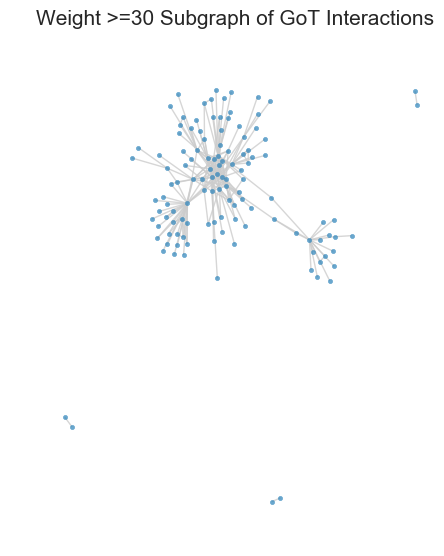

In [15]:
#Clearer picture off of subgraph
plt.figure(figsize=(5,6), dpi=100, frameon=False)
plt.suptitle('Weight >=30 Subgraph of GoT Interactions', fontsize=15)
plt.autoscale(enable=True, axis='both', tight=True)
plt.axis('off')

#Subset of graph
spring_pos = nx.fruchterman_reingold_layout(SG, scale=1, center=(0,0))

#nx.draw_networkx(G, pos = spring_pos, with_labels = False, node_size =15, node_color='b', edge_alpha=0.5)
nx.draw_networkx_edges(SG, pos = spring_pos, with_labels = False, alpha=0.8, edge_color="#CCCCCC")
nx.draw_networkx_nodes(SG, pos = spring_pos, with_labels = False, node_size=10, alpha=0.7, node_color=Spectral4[0])
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

#### Heat Map Example

A heat map (or matrix diagram), is a 2D representation of a graph (or the adjacency matrix of a graph) where both x and y axes are the nodes in our graph and the color of the cell being the edge weight. The advantage of using this visual take the complexity out of viewing a large network map where edges can be overlapped making relationships hard to fully realize.

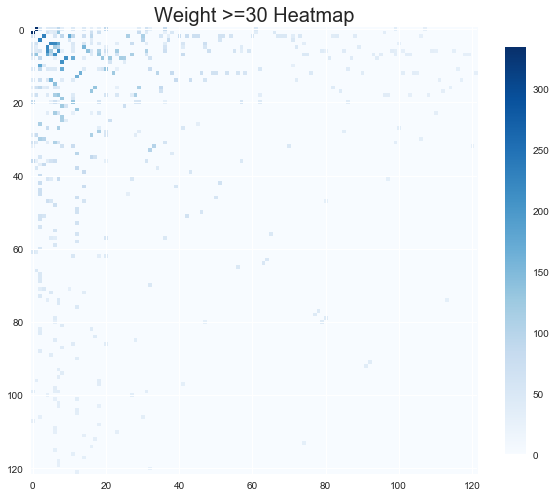

In [16]:
ord_edg=sorted(list(SG.edges_iter(data='weight')), key=lambda x: x[2], reverse=True)
SG2 = nx.Graph()
SG2.add_weighted_edges_from(ord_edg)
draw_adjacency_matrix(SG, node_order=SG2.nodes())

## <span style="color:#0000CD"> Graph Layouts </span> 

When visualizing a graph using a node-link diagram, there are several layout methods or algorithms used for drawing a graph. Choosing the right layout for your graph is important for visual analytics of your graph's structure. 

Reference some options here: https://en.wikipedia.org/wiki/Graph_drawing

### Example - Hierarchical or Tree layout

<img src="https://img.buzzfeed.com/buzzfeed-static/static/2014-03/enhanced/webdr02/17/6/anigif_enhanced-29051-1395051433-3.gif" alt="Drawing" style="width: 400px"/>

Gif Cred: [Tom Phillips](https://www.buzzfeed.com/tomphillips/charts-only-people-who-live-in-westeros-will-undestand?utm_term=.fxpaN6j3Z#.inW21kENY)

#### Circular Layout

In a circular layout the nodes are placed on a circle (often evenly spaced) with the edges connecting the related nodes. The benefits of using a circular layout is its neutrality in its placement of the nodes (no node is given greater importance by placing it in the center). 

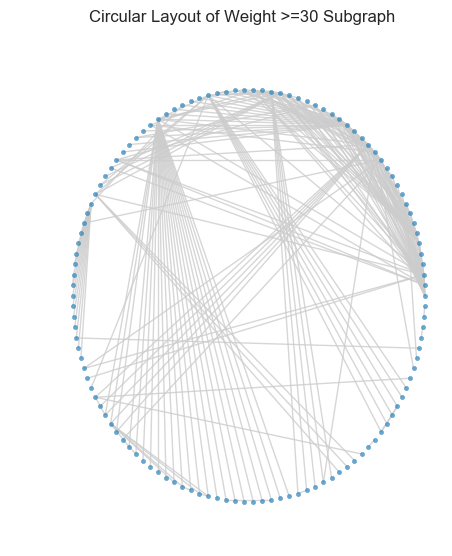

In [17]:
#Circular Layout
plt.figure(figsize=(5,6), dpi=100, frameon=False)
plt.autoscale(enable=True, axis='both', tight=True)
plt.suptitle("Circular Layout of Weight >=30 Subgraph", fontsize=12)
plt.axis('off')

#Subset of graph
spring_pos =nx.circular_layout(SG,scale=1,center=(0,0))

#nx.draw_networkx(G, pos = spring_pos, with_labels = False, node_size =15, node_color='b', edge_alpha=0.5)
nx.draw_networkx_edges(SG, pos = spring_pos, with_labels = False, alpha=0.8, edge_color="#CCCCCC")
nx.draw_networkx_nodes(SG, pos = spring_pos, with_labels = False, node_size=10, alpha=0.7, node_color=Spectral4[0])
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

#### Fruchterman Reingold layout
One example of a  force-directed algorithm, where the vertex layout is determined by the forces pulling vertices together and pushing them apart over several iterations. Pull forces occur for adjacent vertices only, and push forces occur between every pair of vertices. Each iteration computes the sum of the forces on each vertex, then moves the vertices to their new positions.

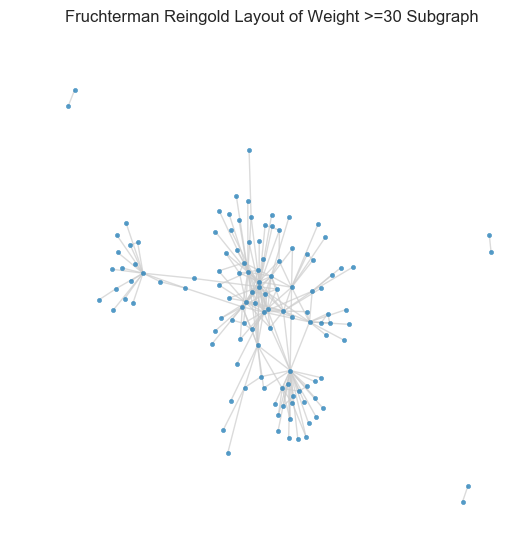

In [18]:
plt.figure(figsize=(6,6), dpi=100, frameon=False)
plt.autoscale(enable=True, axis='both', tight=True)
plt.suptitle("Fruchterman Reingold Layout of Weight >=30 Subgraph", fontsize=12)
plt.axis('off')

#Subset of graph
spring_pos = nx.fruchterman_reingold_layout(SG, scale=1, center=(0,0))

#nx.draw_networkx(G, pos = spring_pos, with_labels = False, node_size =15, node_color='b', edge_alpha=0.5)
nx.draw_networkx_edges(SG, pos = spring_pos, with_labels = False, alpha=0.7, edge_color="#CCCCCC")
nx.draw_networkx_nodes(SG, pos = spring_pos, with_labels = False, node_size=10, alpha=0.8, node_color=Spectral4[0])
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

### Question?
***Out of the two layouts above, which one do you prefer?***

## <span style="color:#0000CD"> Visual Controls  </span>  

To again help with visual analytics, network maps can be customized by the node and edge attributes.

### Node Controls
Node shapes and/or color to denoted by node attributes to see groups within a graph. Below, we see red diamonds for those characters who are noble.

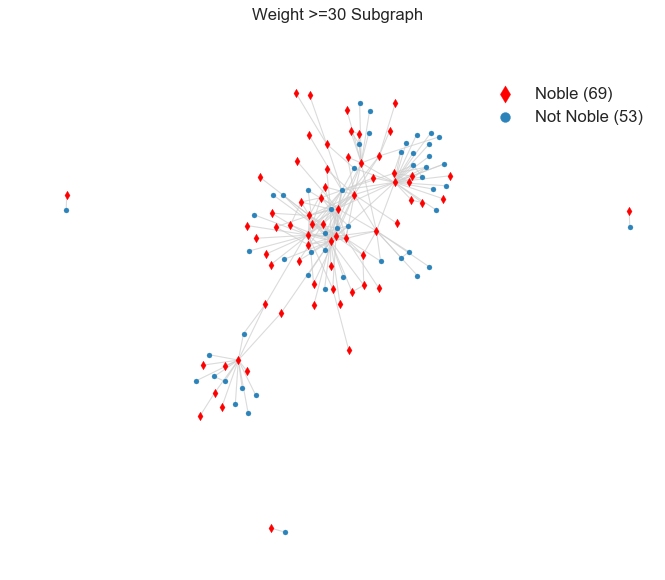

In [19]:
# Diamond and Red nodes for characters defined as being noble
noble = [x for x,y in SG.nodes(data=True) if y['Nobility']==1]
unk_noble = list(set(SG.nodes()) - set(noble))

# plot the figure and save it as an image

plt.figure(figsize=(10,8), dpi=80, frameon=False)
plt.suptitle("Weight >=30 Subgraph", fontsize=15)

# NEED TO ADD LEGEND
#plt.legend([],[red_dmnd], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.autoscale(enable=True, axis='both', tight=True)
plt.axis('off')
# create the network layout
spring_pos = nx.fruchterman_reingold_layout(SG, scale=2, center=(0,0))

nx.draw_networkx_nodes(SG, pos=spring_pos,                       
                       nodelist=noble,
                       label='Noble (69)',
                       node_size=30,  
                       node_color='r', 
                       node_shape='d')

nx.draw_networkx_nodes(SG, pos=spring_pos, 
                       nodelist=unk_noble,
                       label='Not Noble (53)',
                       node_size=20,  
                       node_color=Spectral4[0])

nx.draw_networkx_edges(SG, pos = spring_pos, with_labels = False, alpha=0.7, edge_color="#CCCCCC")

plt.legend(numpoints=1, loc='best', markerscale=2, fontsize=15  )
plt.show()

### Edge Controls

Edge attributes can also be visualized on a graph. Below we are showing weight (characters interaction total) as the width of the edge, as well as a continuous color scale of Green. The higher the weight the bolder the color green and lower weight lighter green. 

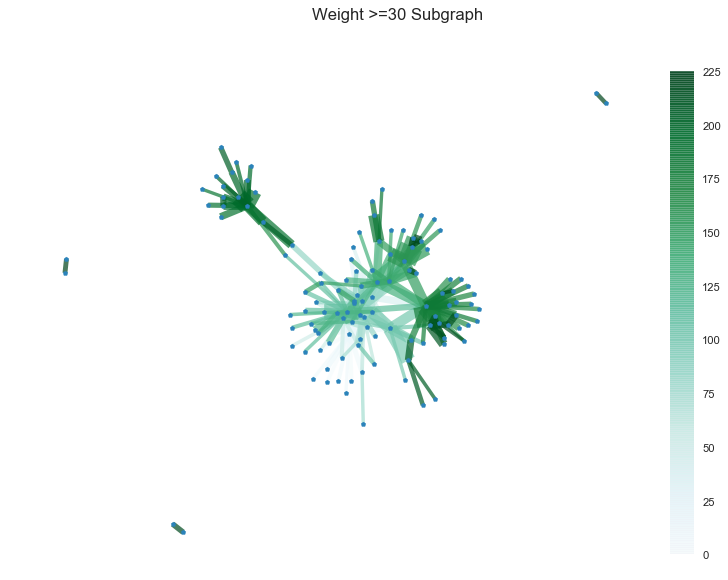

In [20]:
weights=nx.get_edge_attributes(SG, 'weight')
weights=np.array(list(weights.values()))/10

# plot the figure 
plt.figure(figsize=(12,8), dpi=80, frameon=False)
plt.suptitle("Weight >=30 Subgraph", fontsize=15)
plt.autoscale(enable=True, axis='both', tight=True)
plt.axis('off')
# create the network layout
spring_pos = nx.fruchterman_reingold_layout(SG, scale=2, center=(0,0))

nx.draw_networkx_nodes(SG, pos=spring_pos, 
                       node_size=20,  
                       node_color=Spectral4[0], 
                      node_shape='p')
colors=range(len(SG.edges()))
#nx.draw(G,pos,node_color='#A0CBE2',edge_color=colors,width=4,edge_cmap=plt.cm.Blues,with_labels=False)

edges = nx.draw_networkx_edges(SG, pos = spring_pos, 
                       alpha=0.7, 
                       width=weights,
                       edge_color=colors,
                       edge_cmap=plt.cm.BuGn)
plt.colorbar(edges)
plt.show()

### Interactive Network

Giving the user the ability to hover, zoom, and search into each area of interest without having to output data or re-render the graph visual.

In [21]:
plot = figure(plot_width=800, plot_height=600,
            title='Graph Interaction Demonstration',
            x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))

plot.add_tools(HoverTool(tooltips=[("Character","@index")]), TapTool(), BoxSelectTool())

plot.xgrid.grid_line_color = None
plot.ygrid.grid_line_color = None
plot.axis.visible = False
 
graph_renderer = from_networkx(SG, nx.fruchterman_reingold_layout, scale=2, center = (0.5,0.5))
    
graph_renderer.node_renderer.glyph = Circle(size=10, fill_color=Spectral4[0] )
graph_renderer.node_renderer.selection_glyph = Circle(fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=2)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=2)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = NodesAndLinkedEdges()

plot.renderers.append(graph_renderer)

output_file(filename = "../img/subgraph_labels.html")
#show(plot)
save(plot, filename = "../img/subgraph_labels.html")

#Workaround for displaying bokeh
IFrame('../img/subgraph_labels.html', width=850, height=650)